Epoch 1/20
121/121 [==============================] - 17s 32ms/step - loss: 0.0021
Epoch 2/20
121/121 [==============================] - 5s 39ms/step - loss: 5.5252e-05
Epoch 3/20
121/121 [==============================] - 4s 36ms/step - loss: 5.1925e-05
Epoch 4/20
121/121 [==============================] - 6s 49ms/step - loss: 5.2098e-05
Epoch 5/20
121/121 [==============================] - 7s 60ms/step - loss: 5.2863e-05
Epoch 6/20
121/121 [==============================] - 7s 60ms/step - loss: 5.5842e-05
Epoch 7/20
121/121 [==============================] - 7s 61ms/step - loss: 4.9907e-05
Epoch 8/20
121/121 [==============================] - 15s 123ms/step - loss: 4.8493e-05
Epoch 9/20
121/121 [==============================] - 7s 60ms/step - loss: 4.7355e-05
Epoch 10/20
121/121 [==============================] - 8s 63ms/step - loss: 4.6979e-05
Epoch 11/20
121/121 [==============================] - 8s 65ms/step - loss: 4.5687e-05
Epoch 12/20
121/121 [==============================] 

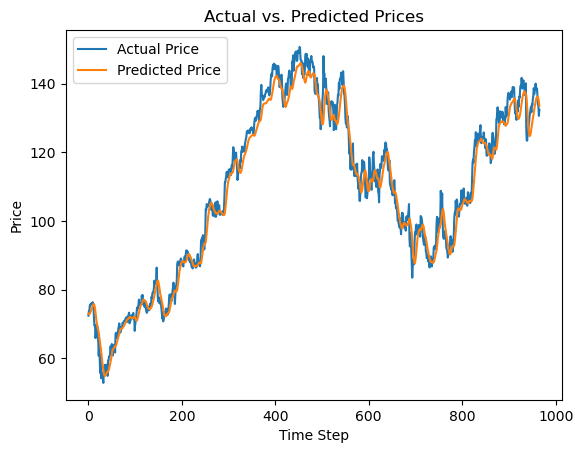

1/1 [==============================] - 0s 203ms/step


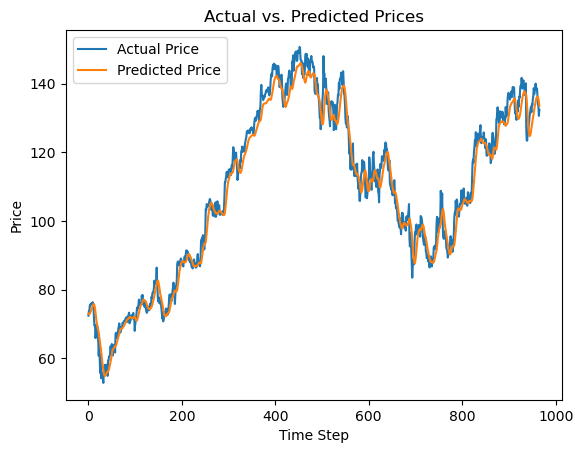

In [ ]:
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('GOOG.csv')

# Extract 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the prices
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(prices)

# Function to create sequences for RNN
def create_sequences(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i + seq_length])
    y.append(data[i + seq_length])
  return np.array(X), np.array(y)

# Create sequences with a sequence length of 30 days
sequence_length = 30
X, y = create_sequences(normalized_prices, sequence_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the RNN model
model = Sequential([
  LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
  LSTM(units=50),
  Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predictions on test set
y_pred = model.predict(X_test)

# Denormalize predictions and actual prices
y_pred_denormalized = scaler.inverse_transform(y_pred)
y_test_denormalized = scaler.inverse_transform(y_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_denormalized, y_pred_denormalized)


# Function to visualize actual vs predicted prices
def visualize_predictions():
  plt.plot(y_test_denormalized, label='Actual Price')
  plt.plot(y_pred_denormalized, label='Predicted Price')
  plt.xlabel('Time Step')
  plt.ylabel('Price')
  plt.legend()
  plt.title('Actual vs. Predicted Prices')
  plt.show()

# GUI
def predict_price():
  try:
    # Get user input
    lookback_days = int(entry.get())

    # Prepare input data
    last_sequence = normalized_prices[-sequence_length:]
    X_input = last_sequence.reshape(1, sequence_length, 1)

    # Predict future prices
    predicted_price = model.predict(X_input)

    # Denormalize predicted price
    predicted_price = scaler.inverse_transform(predicted_price)

    # Display the predicted price and accuracy (MAE)
    result_label.config(text=f"Predicted Price: ${predicted_price[0][0]:.2f}\nMAE on Test Data: {mae:.2f}")

  except Exception as e:
    messagebox.showerror("Error", str(e))

# Create tkinter window
window = tk.Tk()
window.title("Stock Price Prediction")

# Create GUI elements
label = tk.Label(window, text="Enter number of past days to consider:")
label.pack()

entry = tk.Entry(window)
entry.pack()

button_predict = tk.Button(window, text="Predict", command=predict_price)
button_predict.pack()

button_visualize = tk.Button(window, text="Visualize", command=visualize_predictions)
button_visualize.pack()

result_label = tk.Label(window, text="")
result_label.pack()

# Run the GUI main loop
window.mainloop()
